Original image shape: (512, 512, 3)


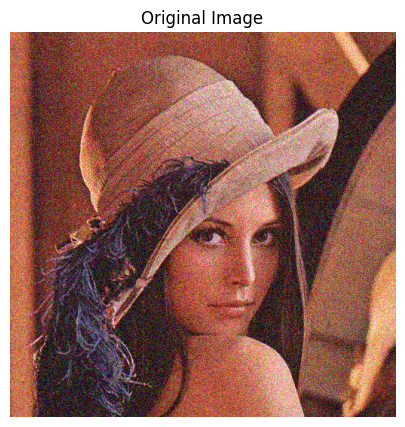

Result image shape: (512, 512, 3)


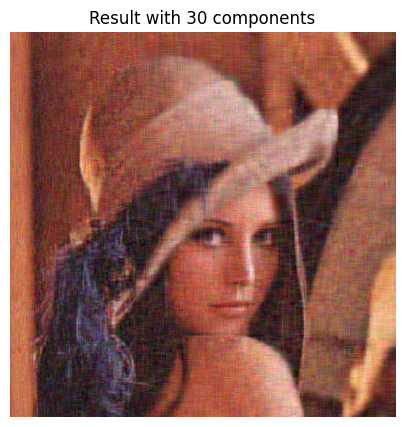

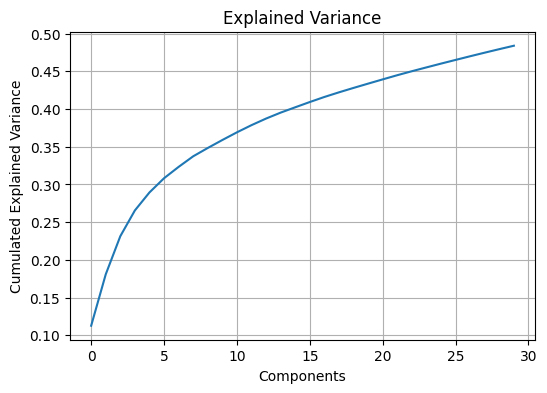

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from PIL import Image

def show_image(image, title):
    plt.figure(figsize=(10, 5))
    plt.imshow(image)
    plt.title(title)
    plt.axis("off")
    plt.show()

def apply_pca(channel, pca):
    # Appliquer PCA au canal
    scaler = StandardScaler()
    channel_normalized = scaler.fit_transform(channel)
    transformed_data = pca.fit_transform(channel_normalized)
    inversed_data = pca.inverse_transform(transformed_data)
    return scaler.inverse_transform(inversed_data)

# Load image
image_path = "../src/base_lena_bruit.png"
image = Image.open(image_path)
image_np = np.array(image)

# Separate the color channels
red_channel = image_np[:, :, 0]
green_channel = image_np[:, :, 1]
blue_channel = image_np[:, :, 2]

# Display original image
show_image(image_np, "Original Image")

# Define PCA
n_components = 30
pca = PCA(n_components=n_components)

# Apply PCA to each channel
red_channel_result = apply_pca(red_channel, pca)
green_channel_result = apply_pca(green_channel, pca)
blue_channel_result = apply_pca(blue_channel, pca)

# Clip values to be in the range [0, 255]
red_channel_result = np.clip(red_channel_result, 0, 255).astype(np.uint8)
green_channel_result = np.clip(green_channel_result, 0, 255).astype(np.uint8)
blue_channel_result = np.clip(blue_channel_result, 0, 255).astype(np.uint8)

# Reconstruct the RGB image
image_np_result = np.stack((red_channel_result, green_channel_result, blue_channel_result), axis=-1)

# Display the result
show_image(image_np_result, f"Result with {n_components} components")

# Plot explained variance ratio
plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Components")
plt.ylabel("Cumulated Explained Variance")
plt.title("Explained Variance")
plt.grid(True)
plt.show()


Original image shape: (512, 512, 3)


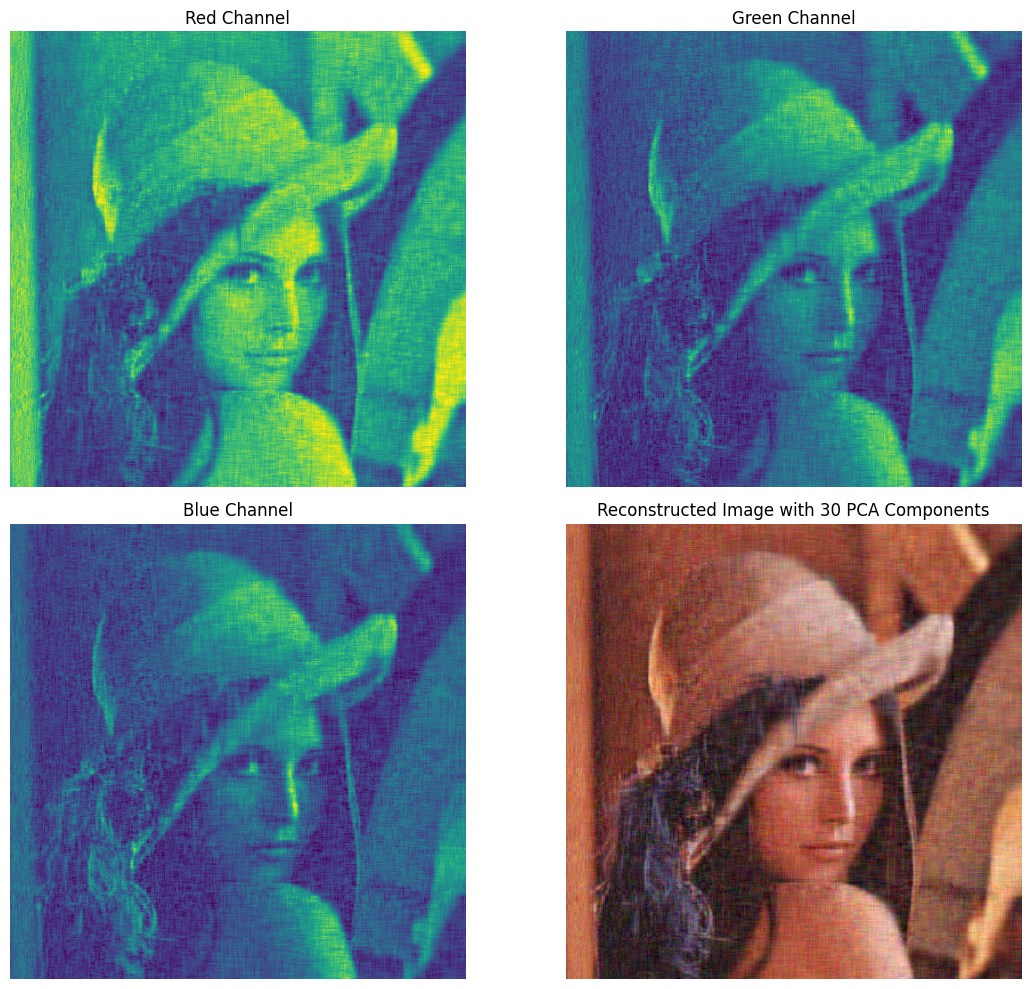

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from PIL import Image

def apply_pca(channel, pca):
    # Normaliser les données du canal
    scaler = StandardScaler()
    channel_normalized = scaler.fit_transform(channel)
    
    # Appliquer PCA
    transformed_data = pca.fit_transform(channel_normalized)
    inversed_data = pca.inverse_transform(transformed_data)
    
    # Inverser la normalisation
    return scaler.inverse_transform(inversed_data)

# Charger l'image
image_path = "../src/base_lena_bruit.png"
image = Image.open(image_path)
image_np = np.array(image)
print("Original image shape:", image_np.shape)

# Séparer les canaux de couleur
red_channel = image_np[:, :, 0]
green_channel = image_np[:, :, 1]
blue_channel = image_np[:, :, 2]

# Afficher l'image originale
plt.figure(figsize=(12, 10))

# Définir PCA
n_components = 30
pca = PCA(n_components=n_components)

# Appliquer PCA à chaque canal
red_channel_result = apply_pca(red_channel, pca)
green_channel_result = apply_pca(green_channel, pca)
blue_channel_result = apply_pca(blue_channel, pca)

# Clip des valeurs et convertir en uint8
red_channel_result = np.clip(red_channel_result, 0, 255).astype(np.uint8)
green_channel_result = np.clip(green_channel_result, 0, 255).astype(np.uint8)
blue_channel_result = np.clip(blue_channel_result, 0, 255).astype(np.uint8)

# Afficher le canal rouge
plt.subplot(2, 2, 1)
plt.imshow(red_channel_result)
plt.title('Red Channel')
plt.axis('off')

# Afficher le canal vert
plt.subplot(2, 2, 2)
plt.imshow(green_channel_result)
plt.title('Green Channel')
plt.axis('off')

# Afficher le canal bleu
plt.subplot(2, 2, 3)
plt.imshow(blue_channel_result)
plt.title('Blue Channel')
plt.axis('off')

# Reconstruire l'image RGB
image_np_result = np.stack((red_channel_result, green_channel_result, blue_channel_result), axis=-1)

# Afficher l'image reconstruite
plt.subplot(2, 2, 4)
plt.imshow(image_np_result)
plt.title(f'Reconstructed Image with {n_components} PCA Components')
plt.axis('off')

# Afficher les sous-graphiques
plt.tight_layout()
plt.show()
